In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Benchmark1_for_rearr as Benchmark1
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=50, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=14, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=9, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=38, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

benchmark1 = Benchmark1(
    robot_name="panda", geom="visual", is_pyplot=False, box_num=6
)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-07 15:29:02.608147: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-87766299-e956-4e1d-a049-8d38a8f73256.json


*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=F_box, pos=[0.6        0.         0.88329998])]}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=E_box, pos=[ 0.6        -0.2         0.88329998])]}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=D_box, pos=[0.6        0.2        0.88329998])]}),
             ('D_box',
              {'on': Object(name=C_box, pos=[0.6        0.2        0.83329998])}),
             ('E_box',
              {'on': Object(name=B_box, pos=[ 0.6        -0.2         0.83329998])}),
             ('F_box',
              {'on': Object(name=A_box, pos=[0.6        0.         0.83329998])}),
             ('tray_red', {'static': True}),
             ('table',

In [2]:
benchmark1.scene_mngr.scene.benchmark_config

{1: {'stack_num': 6, 'goal_object': 'tray_red'}}

In [3]:
benchmark1.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'A_box': Object(name=A_box, pos=[0.6        0.         0.83329998]),
 'B_box': Object(name=B_box, pos=[ 0.6        -0.2         0.83329998]),
 'C_box': Object(name=C_box, pos=[0.6        0.2        0.83329998]),
 'D_box': Object(name=D_box, pos=[0.6        0.2        0.88329998]),
 'E_box': Object(name=E_box, pos=[ 0.6        -0.2         0.88329998]),
 'F_box': Object(name=F_box, pos=[0.6        0.         0.88329998]),
 'tray_red': Object(name=tray_red, pos=[ 0.6  -0.5   0.81])}

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'A_box': Object(name=A_box, pos=[0.6        0.         0.83329998]), 'B_box': Object(name=B_box, pos=[ 0.6        -0.2         0.83329998]), 'C_box': Object(name=C_box, pos=[0.6        0.2        0.83329998]), 'D_box': Object(name=D_box, pos=[0.6        0.2        0.88329998]), 'E_box': Object(name=E_box, pos=[ 0.6        -0.2         0.88329998]), 'F_box': Object(name=F_box, pos=[0.6        0.         0.88329998]), 'tray_red': Object(name=tray_red, pos=[ 0.6  -0.5   0.81])}


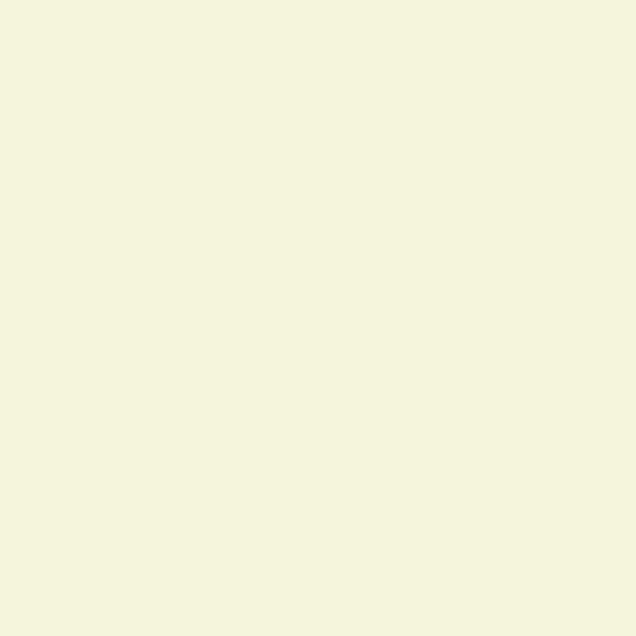

In [4]:
# # # #######################
fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# init_scene
benchmark1.scene_mngr.render_scene(ax)
benchmark1.render_axis(benchmark1.scene_mngr)
benchmark1.scene_mngr.show()


In [5]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
    scene_mngr=benchmark1.scene_mngr,
    init_scene=benchmark1.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c,
    debug_mode=False,
    use_pick_action=False,
    consider_next_scene=True, 
)

mcts.only_optimize_1 = False 
mcts._do_level_2 = False

2023-08-07 15:29:21.985197: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-07 15:29:22.024372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 15:29:22.024514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-07 15:29:22.024537: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-07 15:29:22.027086: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 15:29:22.027120: I tensorflow/strea

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-07 15:29:25.438922: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 15:29:25.439577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 15:29:25.439705: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-07 15:29:25.439759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-07 15:29:26.419315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-07 15:29:26.419343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-07 15:29:26.419351: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-07 15:29:26.419560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 15:29:26.419715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 15:29:26.419828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [6]:
# sup_obj_name = None
# list(mcts.rearr_action.get_arbitrary_location('A_box', support_obj_name=sup_obj_name,scene_for_sample=mcts.init_scene, sample_num= 1))[0]

In [8]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 1, Algo: bai_perturb, C: 3, Seed: 38
=========== Search iteration : 1 ===========
[Action] Rearr D_box to tray_red
[Reward] S(0) -> A(2) -> S'(33) Reward : -0.1
[Action] Rearr F_box to D_box
[Reward] S(33) -> A(37) -> S'(143) Reward : -0.1
[Action] Rearr E_box to table
[Reward] S(143) -> A(144) -> S'(145) Reward : -0.1
[Action] Rearr F_box to table
[Reward] S(145) -> A(146) -> S'(147) Reward : -0.1
[Action] Rearr D_box to table
[Reward] S(147) -> A(148) -> S'(150) Reward : -0.1
[Action] Rearr A_box to tray_red
Good Action
[Reward] S(150) -> A(151) -> S'(156) Reward : 3.333
[Action] Rearr E_box to A_box
[Reward] S(156) -> A(160) -> S'(227) Reward : -0.1
[Action] Rearr F_box to E_box
[Reward] S(227) -> A(228) -> S'(229) Reward : -0.1
Current logical action is None.. Reward is -2.5
[Reward] S(229) -> A(None) -> S'(None) Reward : -2.5
########### Running time :  0.0012221336364746094 ##############

[1/10] Benchmark: 1, Algo: bai_perturb, C: 3, Seed: 38
=========== Searc

[Action] Rearr F_box to D_box
[Reward] S(251) -> A(253) -> S'(254) Reward : -0.1
Current logical action is None.. Reward is -2.5
[Reward] S(254) -> A(None) -> S'(None) Reward : -2.5
########### Running time :  0.23749995231628418 ##############

[1/10] Benchmark: 1, Algo: bai_perturb, C: 3, Seed: 38
=========== Search iteration : 22 ===========
[Action] Rearr D_box to tray_red
[Reward] S(0) -> A(2) -> S'(33) Reward : -0.1
[Action] Rearr F_box to D_box
[Reward] S(33) -> A(37) -> S'(143) Reward : -0.1
[Action] Rearr E_box to table
[Reward] S(143) -> A(144) -> S'(145) Reward : -0.1
[Action] Rearr F_box to table
[Reward] S(145) -> A(146) -> S'(147) Reward : -0.1
[Action] Rearr D_box to table
[Reward] S(147) -> A(148) -> S'(150) Reward : -0.1
[Action] Rearr B_box to tray_red
[Reward] S(150) -> A(152) -> S'(178) Reward : -0.1
[Action] Rearr F_box to B_box
[Reward] S(178) -> A(182) -> S'(255) Reward : -0.1
Current logical action is None.. Reward is -2.857142857142857
[Reward] S(255) -> A(None

[Reward] S(247) -> A(248) -> S'(265) Reward : -0.1
[Action] Rearr F_box to E_box
[Reward] S(265) -> A(266) -> S'(267) Reward : -0.1
Current logical action is None.. Reward is -2.2222222222222223
[Reward] S(267) -> A(None) -> S'(None) Reward : -2.222
########### Running time :  0.46100306510925293 ##############

[1/10] Benchmark: 1, Algo: bai_perturb, C: 3, Seed: 38
=========== Search iteration : 34 ===========
[Action] Rearr D_box to table
[Reward] S(0) -> A(1) -> S'(11) Reward : -0.1
[Action] Rearr E_box to tray_red
[Reward] S(11) -> A(13) -> S'(15) Reward : -0.1
[Action] Rearr F_box to table
[Reward] S(15) -> A(16) -> S'(18) Reward : -0.1
[Action] Rearr E_box to table
[Reward] S(18) -> A(19) -> S'(20) Reward : -0.1
[Action] Rearr A_box to tray_red
Good Action
[Reward] S(20) -> A(21) -> S'(77) Reward : 4.0
[Action] Rearr D_box to A_box
[Reward] S(77) -> A(80) -> S'(83) Reward : -0.1
[Action] Rearr E_box to D_box
[Reward] S(83) -> A(84) -> S'(262) Reward : -0.1
[Action] Rearr F_box to

2023-08-07 14:35:25.252729: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-07 14:35:25.584558: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-07 14:35:26.089446: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 14:35:26.370693: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 46 grasps for object D_box
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0016 sec

F_box
Extracted Region Cube Size:  0.4
Random sample points 
Generated 66 grasps for object F_box
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0049 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTi

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007


Generated 116 grasps for object F_box
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

pick D_box
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.589
WorkingTime[run]: 3.4442 sec

WorkingTime[run]: 0.0496 sec

WorkingTime[run]: 0.0484 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 2.345
WorkingTime[run]: 4.4769 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0038 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.246
WorkingTime[run]: 4.3032 sec

WorkingTime[run]: 0.0506 sec

WorkingTime[run]: 0.0498 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 1.224
WorkingTime[run]: 3.3343 sec

post processing for video save : Joint path : D_box [[ 0.63163352 -0.77526711  0.          0.57311107]
 [ 0.77526711  0.63163352  0.         -0.34768581]
 [ 0.          0.          1.          0.83625   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick F_box
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.456
WorkingTime[run]: 3.2087 sec

WorkingTime[run]: 0.0460 sec

WorkingTime[run]: 0.0531 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.423
WorkingTime[run]: 4.4138 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.976
WorkingTime[run]: 4.1833 sec

WorkingTime[run]: 0.0495 sec

WorkingTime[run]: 0.0539 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 3.096
WorkingTime[run]: 3.2482 sec

post processing for video save : Joint path : F_box [[-0.19505726 -0.98079186  0.          0.5688096 ]
 [ 0.98079186 -0.19505726  0.         -0.34585439]
 [ 0.          0.          1.          0.88675   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick E_box
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0050 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.243
WorkingTime[run]: 3.2832 sec

WorkingTime[run]: 0.0509 sec

WorkingTime[run]: 0.0480 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.3
WorkingTime[run]: 4.3658 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0062 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 0.701
WorkingTime[run]: 4.1907 sec

WorkingTime[run]: 0.0509 sec

WorkingTime[run]: 0.0516 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 0.701
WorkingTime[run]: 3.4459 sec

post processing for video save : Joint path : E_box [[-0.00802991  0.99996776  0.          0.53059032]
 [-0.99996776 -0.00802991  0.          0.05928006]
 [ 0.          0.          1.          0.83379998]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick F_box
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0038 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.298
WorkingTime[run]: 3.4206 sec

WorkingTime[run]: 0.0483 sec

WorkingTime[run]: 0.0473 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.279
WorkingTime[run]: 4.3993 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0039 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.141
WorkingTime[run]: 4.2258 sec

WorkingTime[run]: 0.0503 sec

WorkingTime[run]: 0.0519 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.136
WorkingTime[run]: 3.2910 sec

post processing for video save : Joint path : F_box [[-0.98503715  0.17234214  0.          0.53699805]
 [-0.17234214 -0.98503715  0.          0.22093032]
 [ 0.          0.          1.          0.83379998]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick D_box
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.146
WorkingTime[run]: 3.2859 sec

WorkingTime[run]: 0.0472 sec

WorkingTime[run]: 0.0467 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.316
WorkingTime[run]: 4.5094 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0044 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.501
WorkingTime[run]: 4.2982 sec

WorkingTime[run]: 0.0473 sec

WorkingTime[run]: 0.0472 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.478
WorkingTime[run]: 3.3024 sec

post processing for video save : Joint path : D_box [[ 0.27258404 -0.96213198  0.          0.39141449]
 [ 0.96213198  0.27258404  0.          0.10889851]
 [ 0.          0.          1.          0.83379998]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick A_box
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0043 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.618
WorkingTime[run]: 3.2712 sec

WorkingTime[run]: 0.0492 sec

WorkingTime[run]: 0.0523 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005


Cost is 1.684
WorkingTime[run]: 4.5043 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0093 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.247
WorkingTime[run]: 4.4368 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0475 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.289
WorkingTime[run]: 3.1676 sec

post processing for video save : Joint path : A_box [[ 0.28981163 -0.95708371  0.          0.58217574]
 [ 0.95708371  0.28981163  0.         -0.35122437]
 [ 0.          0.          1.          0.83625   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick B_box
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0046 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.957
WorkingTime[run]: 3.2066 sec

WorkingTime[run]: 0.0511 sec

WorkingTime[run]: 0.0514 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.021
WorkingTime[run]: 4.4349 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1


[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Iterators : 16
WorkingTime[inverse_kinematics]: 0.0080 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0097 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.687
WorkingTime[run]: 4.4868 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0524 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.801
WorkingTime[run]: 3.2376 sec

post processing for video save : Joint path : B_box [[ 0.58980082 -0.80754875  0.          0.59266844]
 [ 0.80754875  0.58980082  0.         -0.34617119]
 [ 0.          0.          1.          0.88675   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick C_box
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.317
WorkingTime[run]: 3.1581 sec

WorkingTime[run]: 0.0482 sec

WorkingTime[run]: 0.0486 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.35
WorkingTime[run]: 4.4058 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.461
WorkingTime[run]: 4.3213 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0496 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.622
WorkingTime[run]: 3.3455 sec

post processing for video save : Joint path : C_box [[ 0.6830012   0.73041725  0.          0.59182336]
 [-0.73041725  0.6830012   0.         -0.34974156]
 [ 0.          0.          1.          0.93725   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick D_box
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0041 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.632
WorkingTime[run]: 3.2910 sec

WorkingTime[run]: 0.0501 sec

WorkingTime[run]: 0.0468 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.567
WorkingTime[run]: 4.6141 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0070 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000306
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.722
WorkingTime[run]: 4.3159 sec

WorkingTime[run]: 0.0498 sec

WorkingTime[run]: 0.0508 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.563
WorkingTime[run]: 3.1824 sec

post processing for video save : Joint path : D_box [[ 0.68996015 -0.72384735  0.          0.5995756 ]
 [ 0.72384735  0.68996015  0.         -0.35189062]
 [ 0.          0.          1.          0.98775   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick E_box
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0070 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.081
WorkingTime[run]: 3.2179 sec

WorkingTime[run]: 0.0504 sec

WorkingTime[run]: 0.0514 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.674
WorkingTime[run]: 4.5799 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0051 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.03
WorkingTime[run]: 4.3103 sec

WorkingTime[run]: 0.0485 sec

WorkingTime[run]: 0.0493 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.126
WorkingTime[run]: 3.2954 sec

post processing for video save : Joint path : E_box [[ 0.6895538   0.72423446  0.          0.59853008]
 [-0.72423446  0.6895538   0.         -0.35499937]
 [ 0.          0.          1.          1.03825   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
pick F_box
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0078 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.981
WorkingTime[run]: 3.1854 sec

WorkingTime[run]: 0.0497 sec

WorkingTime[run]: 0.0500 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.937
WorkingTime[run]: 4.4177 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0121 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0099 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inver

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0054 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000011
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.483
WorkingTime[run]: 4.9519 sec

WorkingTime[run]: 0.0609 sec

WorkingTime[run]: 0.0485 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40


Cost is 4.716
WorkingTime[run]: 3.1810 sec

post processing for video save : Joint path : F_box [[ 0.17367389 -0.98480322  0.          0.5873038 ]
 [ 0.98480322  0.17367389  0.         -0.35314794]
 [ 0.          0.          1.          1.08875   ]
 [ 0.          0.          0.          1.        ]]
Success pnp
History : 18.130880230880237 value_sum : 0.5715
Update Sub optimal Nodes!! Value is 18.70238.
 level 2 value : 18.70238 
History : 18.130880230880237 value_sum : 0.5715
Add level_1_node!
Add level_2_node!
########### Running time :  177.8375027179718 ##############

[1/10] Benchmark: 1, Algo: bai_perturb, C: 3, Seed: 38
=========== Search iteration : 44 ===========
[Action] Rearr D_box to tray_red
[Reward] S(0) -> A(2) -> S'(33) Reward : -0.1
[Action] Rearr F_box to D_box
[Reward] S(33) -> A(37) -> S'(143) Reward : -0.1
[Action] Rearr E_box to table
[Reward] S(143) -> A(144) -> S'(145) Reward : -0.1
[Action] Rearr F_box to table
[Reward] S(145) -> A(146) -> S'(147) Reward : -0.1

In [19]:
mcts.tree.nodes[1]

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7f70422523a0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'D_box',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[ 0.27840802,  0.96046289,  0.        ,  0.54699266],
           [-0.96046289,  0.27840802,  0.        ,  0.05845959],
           [ 0.        ,  0.        ,  1.        ,  0.83379998],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 20.712698412698415,
 'value_history': [-4.057142857142858,
  -5.6000000000000005,
  -7.066666666666667,
  -7.066666666666667,
  0.042857142857142316,
  -3.9000000000000012,
  -4.057142857142858,
  -4.800000000000001,
  -4.333333333333334,
  -4.057142857142858,
  -4.057142857142858,
  -3.9000000000000012,
  -4.057142857142858,
  3.4761904761904754,
  0.042857142857142316,
  0.042857142857142316,
  -4.333333333333334,
  -4.333333333333334,
  -4.057142857142858,
  -0.23333333333333378,
  -4.057142857142858,
  -4.057142857142858,
  6.590476190

In [20]:
mcts.tree.nodes[11]

{'number': 11,
 'visit': 100,
 'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7f6fa426fe50>,
 'action': {'table': array([[ 0.27840802,  0.96046289,  0.        ,  0.54699266],
         [-0.96046289,  0.27840802,  0.        ,  0.05845959],
         [ 0.        ,  0.        ,  1.        ,  0.83379998],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[ 0.92774835,  0.01354113,  0.37296045,  0.55268032],
         [ 0.02530608, -0.99932402, -0.0266669 ,  0.20355904],
         [ 0.37234726,  0.03417835, -0.92746388,  0.98036595],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[ 0.9277483 ,  0.01354113,  0.37296045,  0.5340323 ],
         [ 0.02530608, -0.999324  , -0.0266669 ,  0.20489238],
         [ 0.37234727,  0.03417835, -0.9274639 ,  1.0267391 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[ 0.9277483 ,  0.01354113,  0.37296045,  0.5526803 ]

In [11]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

18.130880230880237 {0: {'nodes': [0, 2, 33, 37, 143, 144, 145, 146, 147, 148, 150, 151, 156, 157, 209, 210, 214, 215, 277, 278, 280, 281, 282], 'value': 18.130880230880237}}

Result 0 :  [0, 2, 33, 37, 143, 144, 145, 146, 147, 148, 150, 151, 156, 157, 209, 210, 214, 215, 277, 278, 280, 281, 282]
state num : 23


In [12]:
mcts.time_used_in_level_1,mcts.time_used_in_level_1_5, mcts.time_used_in_level_2

(4.147456169128418, 5.370365858078003, 171.64880871772766)

In [13]:
mcts.tree.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [14]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   2,
   33,
   37,
   143,
   144,
   145,
   146,
   147,
   148,
   150,
   151,
   156,
   157,
   209,
   210,
   214,
   215,
   277,
   278,
   280,
   281,
   282],
  'value': 18.70238}}

In [15]:
mcts.infeasible_sub_nodes

[]

In [16]:
print(mcts.tree.nodes[3])
for i in mcts.tree.neighbors(88):
    print(i)

{'depth': 1, 'state': <pytamp.scene.scene.Scene object at 0x7f0c4687b5e0>, 'action': {'type': 'rearr', 'rearr_obj_name': 'E_box', 'place_obj_name': 'tray_red', 'rearr_poses': [{'tray_red': array([[ 0.93621162,  0.35143678,  0.        ,  0.53407657],
       [-0.35143678,  0.93621162,  0.        , -0.47552023],
       [ 0.        ,  0.        ,  1.        ,  0.83625   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]}, 'value': -10.2, 'value_history': [-10.2], 'visit': 1, 'number': 3, 'type': 'action', 'joints': [], 'level1': False, 'level2': False, 'level1_5': False, 'success': False, 'cost': 0, 'test': ()}
113


In [14]:
print(mcts.tree.nodes[92])


{'number': 92, 'visit': 4, 'depth': 6, 'state': <pytamp.scene.scene.Scene object at 0x7f6f84646790>, 'action': {'B_box': array([[-0.80872212,  0.5881909 ,  0.        ,  0.55227943],
       [-0.5881909 , -0.80872212,  0.        , -0.43276886],
       [ 0.        ,  0.        ,  1.        ,  0.88675   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, 'value': -2.9000000000000004, 'value_history': [-2.9000000000000004, -3.0571428571428574, -2.9000000000000004, -2.9000000000000004], 'type': 'state', 'joints': [], 'level1': False, 'level2': False, 'level1_5': False, 'success': False, 'cost': 0, 'test': ()}


In [15]:
mcts.tree.nodes[114]['state'].logical_states

OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=tray_red, pos=[ 0.6  -0.5   0.81]),
               'support': [Object(name=C_box, pos=[ 0.55895354 -0.43665233  0.88675   ])]}),
             ('C_box',
              {'on': Object(name=B_box, pos=[ 0.55580162 -0.4316468   0.83625   ])}),
             ('D_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('E_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('F_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red',
              {'static': True,
               'support': [Object(name=B_box, pos=[ 0.55580162 -0.4316468   0.83625   ])]}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.83329998]),
                Object(name=D_box, pos=

In [17]:
for i, n in enumerate(max_value_nodes):
    if i%2==1:
        print(mcts.tree.nodes[2*i-1].get("test"))

()
()
()
()
()
()
()
()
('D_box', array([[ 0.63163352, -0.77526711,  0.        ,  0.57311107],
       [ 0.77526711,  0.63163352,  0.        , -0.34768581],
       [ 0.        ,  0.        ,  1.        ,  0.83625   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]))
()


In [17]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [18]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 0.03304827,  0.20812701, -0.00330085, -2.57755805,  0.01050072,
                          2.91337785, -0.70626646]),
                  array([ 0.06609654,  0.21990449, -0.00660169, -2.53712221,  0.02100144,
                          2.88516304, -0.62713475]),
                  array([ 0.09914481,  0.23168196, -0.00990254, -2.49668638,  0.03150217,
                          2.85694824, -0.54800304]),
                  array([ 0.13219307,  0.24345944, -0.01320338, -2.45625055,  0.04200289,
                          2.82873344, -0.46887134]),
                  array([ 0.16524134,  0.25523691, -0.01650423, -2.41581471,  0.05250361,
                          2.80051863, -0.38973963]),
                  array([ 0.19828961,  0.26701438, -0.01980508, -2.37537888,  0.06300433,
                          2.77230383, -0.31060792]),
                  array([ 0.23133788,  0.27879186, -0.02310592, -2.33494305,  0.07350506,
                      

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
1000 scene
1100 scene
1200 scene
1300 scene
1400 scene
1500 scene
1600 scene
1700 scene
1800 scene
1900 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


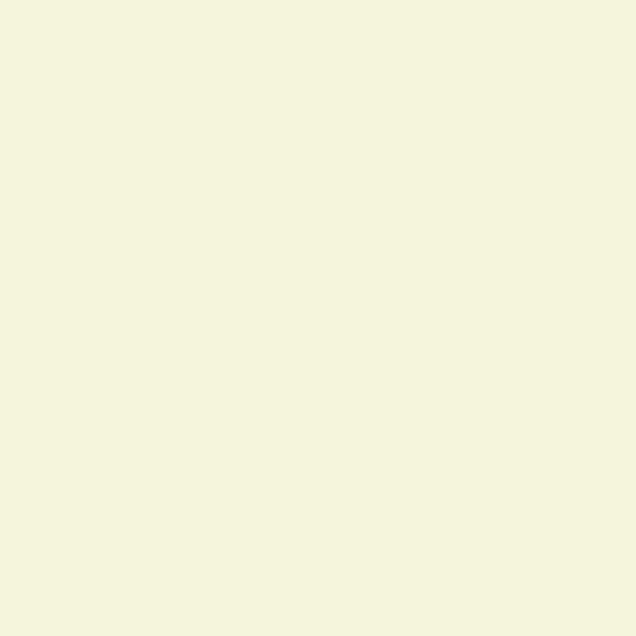

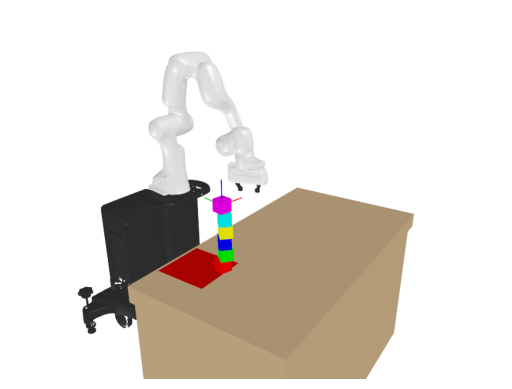

In [19]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark1_grasp_using_contact_graspnet_consider_next_scene_block_6",
)
